In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt

In [2]:
# generate inputs
def generate_linear(n = 100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []

    for pt in pts:
        inputs.append([pt[0], pt[1]])
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)

    return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue
        
        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(21, 1)

In [3]:
# visualization
def show_result(x, y, pred_y):
    y = y.ravel()
    pred_y = pred_y.ravel()

    plt.subplot(1, 2, 1)
    plt.title("Ground truth", fontsize = 18)

    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1, 2, 2)
    plt.title("Predict result", fontsize = 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()

def show_loss(loss, epoch, interval):
    epochs = np.arange(0, interval + epoch, interval)
    plt.plot(epochs, loss, 'r-o')
    plt.title("Loss curve", fontsize = 18)
    plt.show()

In [4]:
# sigmoid function
def sigmoid(x):
    sigmoid_vec = np.vectorize(lambda t: 1 / (1 + np.exp(-t)) if t > 0 else 1 - 1 / (1 + np.exp(t)))
    return sigmoid_vec(x)
# derivative of sigmoid function
def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

In [5]:
# visualization
def show_result(x, y, pred_y):
    y = y.ravel()
    pred_y = pred_y.ravel()

    plt.subplot(1, 2, 1)
    plt.title("Ground truth", fontsize = 18)

    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1, 2, 2)
    plt.title("Predict result", fontsize = 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()

def show_loss(loss, epoch, interval):
    epochs = np.arange(0, interval + epoch, interval)
    plt.plot(epochs, loss, 'r-o')
    plt.title("Loss curve", fontsize = 18)
    plt.show()

In [6]:
class NN:
    def __init__(self, n1, n2, lr=0.01, epochs=2000, interval=100, activation_fn = True):
        self.epsilon = 1e-9
        self.lr = lr
        self.n1 = n1
        self.n2 = n2
        self.epochs = epochs
        self.interval = interval
        self.activation_fn = activation_fn
        self.loss_arr = []
        
        self.input = np.random.rand(2, 1)
        self.W1 = np.random.rand(n1, 2)
        self.W2 = np.random.rand(n2, n1)
        self.W3 = np.random.rand(1, n2)
        self.H1 = np.random.rand(n1, 1)
        self.H2 = np.random.rand(n2, 1)
        self.H3 = np.random.rand(1, 1)
        self.Z1 = np.random.rand(n1, 1)
        self.Z2 = np.random.rand(n2, 1)
        self.output = np.random.rand(1, 1)
    
    def loss_fn(self, y, pred_y):
        '''cross-entropy'''
        return -np.matmul(y.T, np.log(pred_y + self.epsilon)) - np.matmul((1-y).T, np.log(1 - pred_y + self.epsilon))
    
    def forward(self, X):
        self.input = X
        self.H1 = np.matmul(self.W1, self.input)
        if self.activation_fn:
            self.Z1 = sigmoid(self.H1)
        else:
            self.Z1 = self.H1
        self.H2 = np.matmul(self.W2, self.Z1)
        if self.activation_fn:
            self.Z2 = sigmoid(self.H2)
        else:
            self.Z2 = self.H2
        self.H3 = np.matmul(self.W3, self.Z2)
        # Last layer must use a sigmoid to constraint the output into (0, 1) interval for predictions
        self.output = sigmoid(self.H3)

        return self.output

    def backward(self, y, pred_y):
        Cost_to_predy = (1 - y) / (1 - pred_y + self.epsilon) - y / (pred_y + self.epsilon)
        # Last layer must use a sigmoid to constraint the output into (0, 1) interval for predictions
        predy_to_H3 = np.diag(derivative_sigmoid(self.output).reshape(-1))
        H3_to_W3 = self.Z2.T
        Cost_to_H3 = np.matmul(Cost_to_predy, predy_to_H3)
        Cost_to_W3 = np.matmul(Cost_to_H3, H3_to_W3)

        H3_to_Z2 = self.W3
        if self.activation_fn:
            Z2_to_H2 = np.diag(derivative_sigmoid(self.Z2).reshape(-1))
        else:
            Z2_to_H2 = np.identity(derivative_sigmoid(self.Z2).reshape(-1).shape[0])
        H2_to_W2 = np.zeros((self.H2.shape[0], self.W2.shape[0] * self.W2.shape[1]))
        n, m = self.H2.shape[0], self.W2.shape[1]
        for i in range(n):
            H2_to_W2[i, i * m: (i+1) * m] = self.Z1.reshape(-1)
        Cost_to_H2 = np.linalg.multi_dot([Cost_to_H3, H3_to_Z2, Z2_to_H2])
        Cost_to_W2 = np.matmul(Cost_to_H2, H2_to_W2)
        Cost_to_W2 = Cost_to_W2.reshape(n, m)
        
        H2_to_Z1 = self.W2
        if self.activation_fn:
            Z1_to_H1 = np.diag(derivative_sigmoid(self.Z1).reshape(-1))
        else:
            Z1_to_H1 = np.identity(derivative_sigmoid(self.Z1).reshape(-1).shape[0])
        H1_to_W1 = np.zeros((self.H1.shape[0], self.W1.shape[0] * self.W1.shape[1]))
        n, m = self.H1.shape[0], self.W1.shape[1]
        for i in range(n):
            H1_to_W1[i, i * m: (i + 1) * m] = self.input.reshape(-1)
        Cost_to_H1 = np.linalg.multi_dot([Cost_to_H2, H2_to_Z1, Z1_to_H1])
        Cost_to_W1 = np.matmul(Cost_to_H1, H1_to_W1)
        Cost_to_W1 = Cost_to_W1.reshape(n, m)
        
        self.W1 -= self.lr * Cost_to_W1
        self.W2 -= self.lr * Cost_to_W2
        self.W3 -= self.lr * Cost_to_W3
        return
        

    def train(self, X, y):
        for e in range(self.epochs):
            if e == round(self.epochs / 2):
                self.lr /= 2 # scheduler
            for i in range(X.shape[0]):
                self.output = self.forward(X[i: (i + 1), :].T)
                self.backward(y[i: (i + 1), :], self.output)

            if e % self.interval == 0:
                print('Epochs {}: '.format(e), end = '')
                self.test(X, y)

        print('Training finished')
        self.test(X, y)
        show_loss(self.loss_arr, self.epochs, self.interval)

    def test(self, X, y):     
        error = 0.0
        pred_y = np.zeros_like(y, dtype = float)
        for i in range(X.shape[0]):
            output = self.forward(X[i: (i + 1), :].T)
            pred_y[i, 0] = output.item()
            result = np.round(output)
            error += abs(result - y[i: (i + 1), :])
        error /= X.shape[0]
        loss = self.loss_fn(y, pred_y)
        self.loss_arr.append(loss[0][0])
        print(f"accuracy: {((1 - error) * 100)[0][0]:.2f}%, loss: {loss[0][0]:.5f}")
        print('')

In [7]:
generator = "linear"
'''for linear: use epochs = 1000 is enough, while for XOR, use epochs = 2500, since data size is smaller, need longer training'''
epochs = 1000
interval = 100
'''lr to try: 0.01, 0.1, 1'''
lr = 0.1
'''number of neurons to try
n1 = 5, n2 = 100 (small to big)
n1 = 100, n2 = 5 (big to small)
n1 = 5, n2 = 5 (small to small)
n1 = 100, n2 = 100 (big to big)
'''
n1 = 10
n2 = 10

In [8]:
if generator == "linear":
    X, y = generate_linear(n = 100)
elif generator == "XOR":
    X, y = generate_XOR_easy()
    # every data point in X is a row, [x, y]
else:
    raise NameError("Unknown data generator name.")

In [9]:
# activation_fn = True # turn on activation function or not
# network = NN(n1, n2, lr, epochs, interval)
# network.train(X, y)

In [10]:
# pred_y = np.zeros_like(y)
# for i in range(X.shape[0]):
#     pred_y[i, 0] = np.round(network.forward(X[i: (i + 1), :].T))
# show_result(X, y, pred_y)

In [11]:
# activation_fn = False
# network_no_act = NN(n1, n2, lr, epochs, interval, activation_fn)
# network_no_act.train(X, y)

In [12]:
# pred_y = np.zeros_like(y)
# for i in range(X.shape[0]):
#     pred_y[i, 0] = np.round(network_no_act.forward(X[i: (i + 1), :].T))
# show_result(X, y, pred_y)

In [13]:
def ReLU(z):
    return np.maximum(z, 0)
def derivative_ReLU(z):
    return (z > 0.0) * 1.0

In [14]:
class NN_other_activation:
    def __init__(self, n1, n2, lr=0.01, epochs=2000, interval=100, activation_fn = "ReLU"):
        self.epsilon = 1e-9
        self.lr = lr
        self.n1 = n1
        self.n2 = n2
        self.epochs = epochs
        self.interval = interval
        self.activation_fn = activation_fn
        self.loss_arr = []
        
        self.input = np.random.uniform(-1, 1, (2, 1))
        self.W1 = np.random.uniform(-1, 1, (n1, 2))
        self.W2 = np.random.uniform(-1, 1, (n2, n1))
        self.W3 = np.random.uniform(-1, 1, (1, n2))
        self.H1 = np.random.uniform(-1, 1, (n1, 1))
        self.H2 = np.random.uniform(-1, 1, (n2, 1))
        self.H3 = np.random.uniform(-1, 1, (1, 1))
        self.Z1 = np.random.uniform(-1, 1, (n1, 1))
        self.Z2 = np.random.uniform(-1, 1, (n2, 1))
        self.output = np.random.uniform(-1, 1, (1, 1))
    
    def loss_fn(self, y, pred_y):
        '''cross-entropy'''
        return -np.matmul(y.T, np.log(pred_y + self.epsilon)) - np.matmul((1-y).T, np.log(1 - pred_y + self.epsilon))
    
    def forward(self, X):
        self.input = X
        self.H1 = np.matmul(self.W1, self.input)
        if self.activation_fn == 'ReLU':
            self.Z1 = ReLU(self.H1)
        else:
            self.Z1 = self.H1
        self.H2 = np.matmul(self.W2, self.Z1)
        if self.activation_fn == 'ReLU':
            self.Z2 = ReLU(self.H2)
        else:
            self.Z2 = self.H2
        self.H3 = np.matmul(self.W3, self.Z2)
        # Last layer must use a sigmoid to constraint the output into (0, 1) interval for predictions
        self.output = sigmoid(self.H3)

        return self.output

    def backward(self, y, pred_y):
        Cost_to_predy = (1 - y) / (1 - pred_y + self.epsilon) - y / (pred_y + self.epsilon)
        # Last layer must use a sigmoid to constraint the output into (0, 1) interval for predictions
        predy_to_H3 = np.diag(derivative_sigmoid(self.output).reshape(-1))
        H3_to_W3 = self.Z2.T
        Cost_to_H3 = np.matmul(Cost_to_predy, predy_to_H3)
        Cost_to_W3 = np.matmul(Cost_to_H3, H3_to_W3)

        H3_to_Z2 = self.W3
        if self.activation_fn == 'ReLU':
            Z2_to_H2 = np.diag(derivative_ReLU(self.Z2).reshape(-1))
        else:
            Z2_to_H2 = np.identity(derivative_ReLU(self.Z2).reshape(-1).shape[0])
        H2_to_W2 = np.zeros((self.H2.shape[0], self.W2.shape[0] * self.W2.shape[1]))
        n, m = self.H2.shape[0], self.W2.shape[1]
        for i in range(n):
            H2_to_W2[i, i * m: (i+1) * m] = self.Z1.reshape(-1)
        Cost_to_H2 = np.linalg.multi_dot([Cost_to_H3, H3_to_Z2, Z2_to_H2])
        Cost_to_W2 = np.matmul(Cost_to_H2, H2_to_W2)
        Cost_to_W2 = Cost_to_W2.reshape(n, m)
        
        H2_to_Z1 = self.W2
        if self.activation_fn == 'ReLU':
            Z1_to_H1 = np.diag(derivative_ReLU(self.Z1).reshape(-1))
        else:
            Z1_to_H1 = np.identity(derivative_ReLU(self.Z1).reshape(-1).shape[0])
        H1_to_W1 = np.zeros((self.H1.shape[0], self.W1.shape[0] * self.W1.shape[1]))
        n, m = self.H1.shape[0], self.W1.shape[1]
        for i in range(n):
            H1_to_W1[i, i * m: (i + 1) * m] = self.input.reshape(-1)
        Cost_to_H1 = np.linalg.multi_dot([Cost_to_H2, H2_to_Z1, Z1_to_H1])
        Cost_to_W1 = np.matmul(Cost_to_H1, H1_to_W1)
        Cost_to_W1 = Cost_to_W1.reshape(n, m)
        
        self.W1 -= self.lr * Cost_to_W1
        self.W2 -= self.lr * Cost_to_W2
        self.W3 -= self.lr * Cost_to_W3
        return
        

    def train(self, X, y):
        for e in range(self.epochs):
            if e == round(self.epochs / 2):
                self.lr /= 2 # scheduler
            for i in range(X.shape[0]):
                self.output = self.forward(X[i: (i + 1), :].T)
                self.backward(y[i: (i + 1), :], self.output)

            if e % self.interval == 0:
                print('Epochs {}: '.format(e), end = '')
                self.test(X, y)

        print('Training finished')
        self.test(X, y)
        show_loss(self.loss_arr, self.epochs, self.interval)

    def test(self, X, y):     
        error = 0.0
        pred_y = np.zeros_like(y, dtype = float)
        for i in range(X.shape[0]):
            output = self.forward(X[i: (i + 1), :].T)
            pred_y[i, 0] = output.item()
            result = np.round(output)
            error += abs(result - y[i: (i + 1), :])
        error /= X.shape[0]
        loss = self.loss_fn(y, pred_y)
        self.loss_arr.append(loss[0][0])
        print(f"accuracy: {((1 - error) * 100)[0][0]:.2f}%, loss: {loss[0][0]:.5f}")
        print('')

In [15]:
# generator = "linear"
# epochs = 1000
# interval = 100
# lr = 0.1
# n1 = 10
# n2 = 10

In [16]:
# if generator == "linear":
#     X, y = generate_linear(n = 100)
# elif generator == "XOR":
#     X, y = generate_XOR_easy()
#     # every data point in X is a row, [x, y]
# else:
#     raise NameError("Unknown data generator name.")

In [17]:
# network = NN_other_activation(n1, n2, lr, epochs, interval)
# network.train(X, y)

In [18]:
# pred_y = np.zeros_like(y)
# for i in range(X.shape[0]):
#     pred_y[i, 0] = np.round(network.forward(X[i: (i + 1), :].T))
# show_result(X, y, pred_y)

In [19]:
class Adam_optimizer():
    def __init__(self, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-9):
        self.grad_mean = 0
        self.grad_var = 0 # uncentered
        '''momentum'''
        self.beta1 = beta1 # the exponential decay of the rate for first moment estimates
        self.beta2 = beta2 # the exponential decay of the rate for second moment estimates
        self.epsilon = epsilon # for not dividing from 0
    def step(self, t, w, dw, lr):
        # momentum beta 1
        self.grad_mean = self.beta1 * self.grad_mean + (1 - self.beta1) * dw
        # RMS beta 2
        self.grad_var = self.beta2 * self.grad_var + (1 - self.beta2) * (dw ** 2)
        # bias correction, for moving average based method (RMS)
        grad_mean_corr = self.grad_mean / (1 - self.beta1 ** t)
        grad_var_corr = self.grad_var / (1 - self.beta2 ** t)
        
        # update
        w -= lr * (grad_mean_corr / (np.sqrt(grad_var_corr) + self.epsilon))
        return w

In [20]:
class NN_optimizer:
    def __init__(self, n1, n2, lr=0.01, epochs=2000, interval=100, activation_fn = True, optimizers = None):
        self.epsilon = 1e-9
        self.lr = lr
        self.n1 = n1
        self.n2 = n2
        self.epochs = epochs
        self.interval = interval
        self.activation_fn = activation_fn
        self.optimizers = optimizers
        if optimizers != None:
            assert len(optimizers) == 3 # 3 different optimizers for 3 weight matrixes
        self.t = 1
        self.loss_arr = []
        
        self.input = np.random.rand(2, 1)
        self.W1 = np.random.rand(n1, 2)
        self.W2 = np.random.rand(n2, n1)
        self.W3 = np.random.rand(1, n2)
        self.H1 = np.random.rand(n1, 1)
        self.H2 = np.random.rand(n2, 1)
        self.H3 = np.random.rand(1, 1)
        self.Z1 = np.random.rand(n1, 1)
        self.Z2 = np.random.rand(n2, 1)
        self.output = np.random.rand(1, 1)
    
    def loss_fn(self, y, pred_y):
        '''cross-entropy'''
        return np.absolute(-np.matmul(y.T, np.log(pred_y + self.epsilon)) - np.matmul((1-y).T, np.log(1 - pred_y + self.epsilon)))
    
    def forward(self, X):
        self.input = X
        self.H1 = np.matmul(self.W1, self.input)
        if self.activation_fn:
            self.Z1 = sigmoid(self.H1)
        else:
            self.Z1 = self.H1
        self.H2 = np.matmul(self.W2, self.Z1)
        if self.activation_fn:
            self.Z2 = sigmoid(self.H2)
        else:
            self.Z2 = self.H2
        self.H3 = np.matmul(self.W3, self.Z2)
        # Last layer must use a sigmoid to constraint the output into (0, 1) interval for predictions
        self.output = sigmoid(self.H3)

        return self.output

    def backward(self, y, pred_y, t):
        Cost_to_predy = (1 - y) / (1 - pred_y + self.epsilon) - y / (pred_y + self.epsilon)
        # Last layer must use a sigmoid to constraint the output into (0, 1) interval for predictions
        predy_to_H3 = np.diag(derivative_sigmoid(self.output).reshape(-1))
        H3_to_W3 = self.Z2.T
        Cost_to_H3 = np.matmul(Cost_to_predy, predy_to_H3)
        Cost_to_W3 = np.matmul(Cost_to_H3, H3_to_W3)

        H3_to_Z2 = self.W3
        if self.activation_fn:
            Z2_to_H2 = np.diag(derivative_sigmoid(self.Z2).reshape(-1))
        else:
            Z2_to_H2 = np.identity(derivative_sigmoid(self.Z2).reshape(-1).shape[0])
        H2_to_W2 = np.zeros((self.H2.shape[0], self.W2.shape[0] * self.W2.shape[1]))
        n, m = self.H2.shape[0], self.W2.shape[1]
        for i in range(n):
            H2_to_W2[i, i * m: (i+1) * m] = self.Z1.reshape(-1)
        Cost_to_H2 = np.linalg.multi_dot([Cost_to_H3, H3_to_Z2, Z2_to_H2])
        Cost_to_W2 = np.matmul(Cost_to_H2, H2_to_W2)
        Cost_to_W2 = Cost_to_W2.reshape(n, m)
        
        H2_to_Z1 = self.W2
        if self.activation_fn:
            Z1_to_H1 = np.diag(derivative_sigmoid(self.Z1).reshape(-1))
        else:
            Z1_to_H1 = np.identity(derivative_sigmoid(self.Z1).reshape(-1).shape[0])
        H1_to_W1 = np.zeros((self.H1.shape[0], self.W1.shape[0] * self.W1.shape[1]))
        n, m = self.H1.shape[0], self.W1.shape[1]
        for i in range(n):
            H1_to_W1[i, i * m: (i + 1) * m] = self.input.reshape(-1)
        Cost_to_H1 = np.linalg.multi_dot([Cost_to_H2, H2_to_Z1, Z1_to_H1])
        Cost_to_W1 = np.matmul(Cost_to_H1, H1_to_W1)
        Cost_to_W1 = Cost_to_W1.reshape(n, m)
        
        if self.optimizers:
            self.W1 = self.optimizers[0].step(t, self.W1, Cost_to_W1, self.lr)
            self.W2 = self.optimizers[1].step(t, self.W2, Cost_to_W2, self.lr)
            self.W3 = self.optimizers[2].step(t, self.W3, Cost_to_W3, self.lr)
        else:
            self.W1 -= self.lr * Cost_to_W1
            self.W2 -= self.lr * Cost_to_W2
            self.W3 -= self.lr * Cost_to_W3
        return
        

    def train(self, X, y):
        for e in range(self.epochs):
            if e == round(self.epochs / 2):
                self.lr /= 2 # scheduler
            for i in range(X.shape[0]):
                self.output = self.forward(X[i: (i + 1), :].T)
                self.backward(y[i: (i + 1), :], self.output, self.t)
                self.t += 1

            if e % self.interval == 0:
                print('Epochs {}: '.format(e), end = '')
                self.test(X, y)

        print('Training finished')
        self.test(X, y)
        show_loss(self.loss_arr, self.epochs, self.interval)

    def test(self, X, y):     
        error = 0.0
        pred_y = np.zeros_like(y, dtype = float)
        for i in range(X.shape[0]):
            output = self.forward(X[i: (i + 1), :].T)
            pred_y[i, 0] = output.item()
            result = np.round(output)
            error += abs(result - y[i: (i + 1), :])
        error /= X.shape[0]
        loss = self.loss_fn(y, pred_y)
        self.loss_arr.append(loss[0][0])
        print(f"accuracy: {((1 - error) * 100)[0][0]:.2f}%, loss: {loss[0][0]:.5f}")
        print('')

In [21]:
generator = "linear"
epochs = 1000
interval = 100
lr = 0.1
n1 = 10
n2 = 10

In [22]:
if generator == "linear":
    X, y = generate_linear(n = 100)
elif generator == "XOR":
    X, y = generate_XOR_easy()
    # every data point in X is a row, [x, y]
else:
    raise NameError("Unknown data generator name.")

Epochs 0: accuracy: 66.00%, loss: 64.46156

Epochs 100: accuracy: 99.00%, loss: 2.47704

Epochs 200: accuracy: 99.00%, loss: 2.43345

Epochs 300: accuracy: 96.00%, loss: 11.88112

Epochs 400: accuracy: 99.00%, loss: 2.76632

Epochs 500: accuracy: 98.00%, loss: 5.55650

Epochs 600: accuracy: 99.00%, loss: 2.13096

Epochs 700: accuracy: 99.00%, loss: 1.80387

Epochs 800: accuracy: 100.00%, loss: 1.94258

Epochs 900: accuracy: 99.00%, loss: 1.93513

Training finished
accuracy: 99.00%, loss: 2.68085



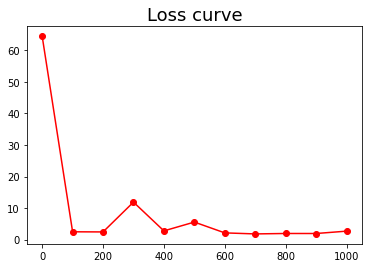

In [23]:
optimizers = [Adam_optimizer(), Adam_optimizer(), Adam_optimizer()]
network = NN_optimizer(n1, n2, lr, epochs, interval, optimizers = optimizers)
network.train(X, y)

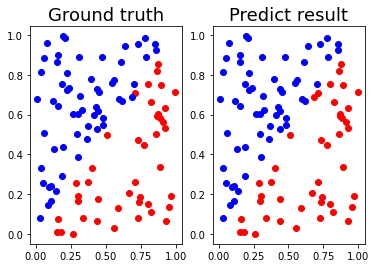

In [24]:
pred_y = np.zeros_like(y)
for i in range(X.shape[0]):
    pred_y[i, 0] = np.round(network.forward(X[i: (i + 1), :].T))
show_result(X, y, pred_y)